In [31]:
!pip install tweepy
!pip install textblob
import tweepy
from textblob import TextBlob
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
consumer_key = 'PUT yours'
consumer_secret = 'PUT yours'
access_token = 'PUT yours'
access_token_secret = 'PUT yours'

# Authenticate with Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Create API object
api = tweepy.API(auth)


auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

api = tweepy.API(auth)


In [33]:
from requests.models import LocationParseError
search_term = 'inecnigeria' # replace with the Twitter account you want to search for
since_date = '2023-03-25'
location = '9.081999,8.675277,50km' # Nigerian geocode
count = 10000


In [34]:
tweets = tweepy.Cursor(api.search_tweets,
                       q=search_term,
                       geocode=location,
                       lang='en',
                       since_id=since_date,
                       count=count).items()

for tweet in tweets:
    print(tweet.text)


Why the fidgeting if they claim that they won the election fairly 

HE Peter Obi has it within his right to seek re… https://t.co/KMpXjT8sUn
@shehu_mahdi
@UNHumanRights
@_SupremeCourt
@PoliceNG
@inecnigeria
Honestly speaking it is very clear that day, as i… https://t.co/JjwjrIyweG
@inecnigeria Buy why you refuse to pay those that work for you during governor election most especially the PO and APO
@teejay__ahmad Except that of @inecnigeria Chairman Yakubu, Lie Mohammed, Tinubu, Shettima and any other Evil APC Politician
@fkeyamo @realFFK @officialABAT @OfficialAPCNg @FMICNigeria Lie Mohammed @MBuhari 

Please be informed that… https://t.co/MwHx8AHmtp
Dear President @MBuhari, we please implore you to do right by Nigeria &amp; Nigerians.

We pray through the Allah that… https://t.co/uRwYIxFvwg
@INECNigeria sacks Adamawa state REC for forcefully and openly trying to rig the Adamawa state gubernatorial electi… https://t.co/pHUozRANt7
@Govshina @inecnigeria He still have the guts  to hired 

In [35]:
import pandas as pd

# create empty list to store data
tweets_data = []

# loop through each tweet and extract relevant information
for tweet in tweepy.Cursor(api.search_tweets,
                           q=search_term,
                           geocode=location,
                           lang='en',
                           since_id=since_date,
                           count=count).items():
    tweet_text = tweet.text
    tweet_user = tweet.user.screen_name
    tweet_date = tweet.created_at
    tweet_location = tweet.user.location
    tweet_data = [tweet_text, tweet_user, tweet_date, tweet_location]
    tweets_data.append(tweet_data)

# create DataFrame from tweets data
df = pd.DataFrame(data=tweets_data, columns=['text', 'user', 'date', 'location'])


In [36]:
df.head()

,text,user,date,location
0,Why the fidgeting if they claim that they won ...,Child_Rep,2023-04-05 23:34:04+00:00,"Abuja, Nigeria"
1,@shehu_mahdi\n@UNHumanRights\n@_SupremeCourt\n...,AbBaminu32,2023-04-05 23:13:14+00:00,Abuja
2,@inecnigeria Buy why you refuse to pay those t...,adedijil,2023-04-05 21:45:01+00:00,ABUJA
3,@teejay__ahmad Except that of @inecnigeria Cha...,Unekzzy_0077,2023-04-05 20:40:35+00:00,"Abuja, Nigeria"
4,@fkeyamo @realFFK @officialABAT @OfficialAPCNg...,Unekzzy_0077,2023-04-05 20:32:55+00:00,"Abuja, Nigeria"


In [37]:
#https://github.com/zhengrui315/Twitter-Sentiment-Analysis/blob/master/twitter_emoji.ipynb

!pip install emoji
import emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import pandas as pd
import re
!pip install demoji
import demoji

# download demoji's emoji dictionary
demoji.download_codes()

# create empty list to store data
tweets_data = []

# loop through each tweet and extract relevant information
for tweet in tweepy.Cursor(api.search_tweets,
                           q=search_term,
                           geocode=location,
                           lang='en',
                           since_id=since_date,
                           count=count).items():
    tweet_text = tweet.text
    tweet_user = tweet.user.screen_name
    tweet_date = tweet.created_at
    tweet_location = tweet.user.location

    # remove web links
    tweet_text = re.sub(r'http\S+', '', tweet_text)

    # remove usernames and mentions
    tweet_text = re.sub(r'@[^\s]+', '', tweet_text)

    # remove emojis
    emoji_less_text = demoji.replace(tweet_text, "")

    # remove extra white spaces
    tweet_text = re.sub(r'\s+', ' ', emoji_less_text)

    # remove any remaining non-alphanumeric characters and convert to lowercase
    tweet_text = re.sub(r'[^a-zA-Z0-9\s]', '', tweet_text)
    tweet_text = tweet_text.lower()

    # remove non-alphanumeric characters
    alphanumeric_text = re.sub(r'[^a-zA-Z0-9\s]', '', emoji_less_text)

    # append cleaned tweet data to tweets_data list
    tweet_data = [tweet_text, tweet_user, tweet_date, tweet_location]
    tweets_data.append(tweet_data)

# create DataFrame from tweets data
df = pd.DataFrame(data=tweets_data, columns=['text', 'user', 'date', 'location'])


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-38-57c97096a606>:7: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [39]:
df.head()

,text,user,date,location
0,why the fidgeting if they claim that they won ...,Child_Rep,2023-04-05 23:34:04+00:00,"Abuja, Nigeria"
1,honestly speaking it is very clear that day a...,AbBaminu32,2023-04-05 23:13:14+00:00,Abuja
2,buy why you refuse to pay those that work for...,adedijil,2023-04-05 21:45:01+00:00,ABUJA
3,except that of chairman yakubu lie mohammed t...,Unekzzy_0077,2023-04-05 20:40:35+00:00,"Abuja, Nigeria"
4,lie mohammed please be informed that,Unekzzy_0077,2023-04-05 20:32:55+00:00,"Abuja, Nigeria"


In [40]:
from textblob import TextBlob

# add sentiment polarity and subjectivity columns to the dataframe
df['polarity'] = df['text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

# classify tweets as positive, negative, or neutral based on polarity scores
df['sentiment'] = df['polarity'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))


In [41]:
df.head()

,text,user,date,location,polarity,subjectivity,sentiment
0,why the fidgeting if they claim that they won ...,Child_Rep,2023-04-05 23:34:04+00:00,"Abuja, Nigeria",0.492857,0.717857,positive
1,honestly speaking it is very clear that day a...,AbBaminu32,2023-04-05 23:13:14+00:00,Abuja,0.365000,0.699167,positive
2,buy why you refuse to pay those that work for...,adedijil,2023-04-05 21:45:01+00:00,ABUJA,0.250000,0.750000,positive
3,except that of chairman yakubu lie mohammed t...,Unekzzy_0077,2023-04-05 20:40:35+00:00,"Abuja, Nigeria",-0.562500,0.687500,negative
4,lie mohammed please be informed that,Unekzzy_0077,2023-04-05 20:32:55+00:00,"Abuja, Nigeria",0.000000,0.000000,neutral


Positive tweets percentage: 28.509406657018815
Negative tweets percentage: 9.985528219971057
Neutral tweets percentage: 61.50506512301013


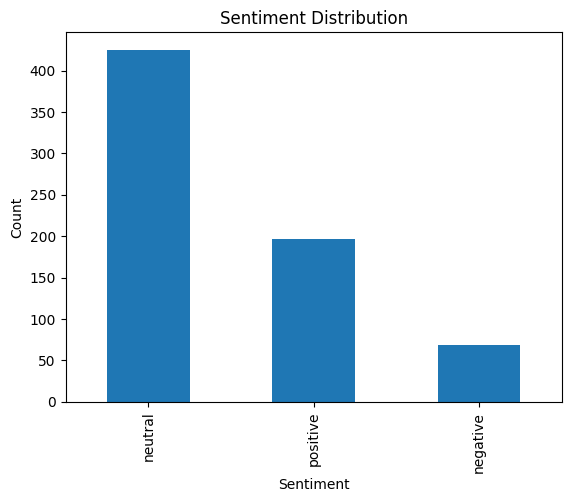

In [42]:
# count the number of tweets for each sentiment
sentiment_counts = df['sentiment'].value_counts()

# calculate the percentage of tweets for each sentiment
positive_percentage = sentiment_counts['positive'] / len(df) * 100
negative_percentage = sentiment_counts['negative'] / len(df) * 100
neutral_percentage = sentiment_counts['neutral'] / len(df) * 100

print("Positive tweets percentage:", positive_percentage)
print("Negative tweets percentage:", negative_percentage)
print("Neutral tweets percentage:", neutral_percentage)


import matplotlib.pyplot as plt

# plot the sentiment distribution
sentiment_counts.plot.bar()

# add titles and labels to the plot
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# show the plot
plt.show()


In [43]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# define X (features) and y (target) variables
X = df['text']
y = df['sentiment']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# vectorize the text data using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# define the LGB classifier model
lgb_clf = lgb.LGBMClassifier()

# train the model on the training data
lgb_clf.fit(X_train_vec, y_train)

# make predictions on the testing data
y_pred = lgb_clf.predict(X_test_vec)

# calculate accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")


Accuracy: 0.5961538461538461


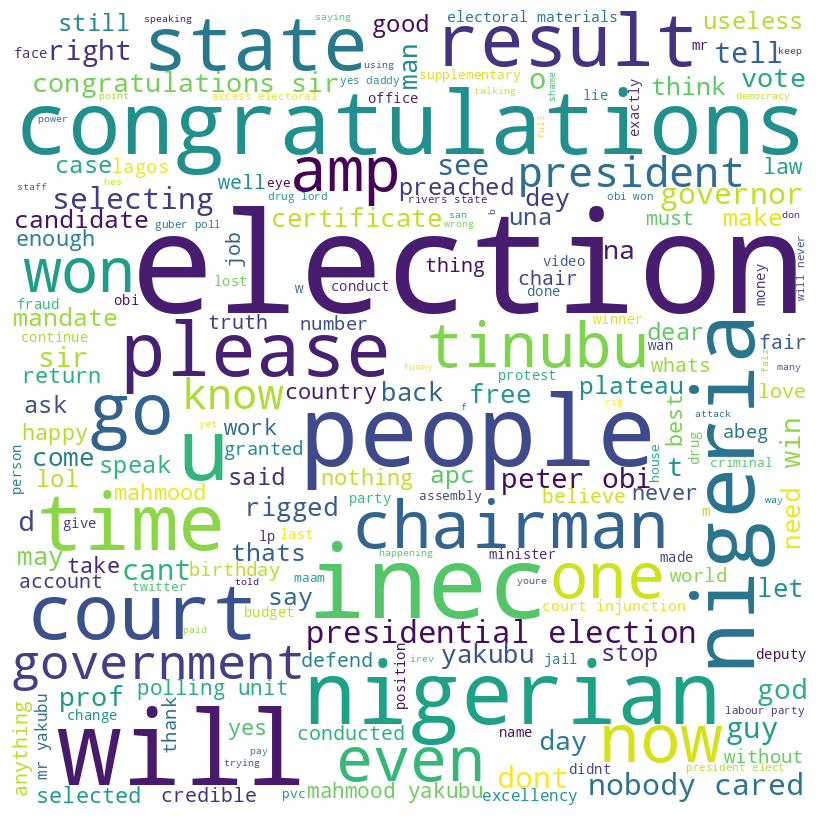

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# create a string containing all the tweets
all_tweets = ' '.join(df['text'].tolist())

# generate a wordcloud plot
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_tweets)

# plot the wordcloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# define X (features) and y (target) variables
X = df['text']
y = df['sentiment']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# define the KNN classifier model
knn_clf = KNeighborsClassifier(n_neighbors=5)

# train the model on the training data
knn_clf.fit(X_train_vec, y_train)

# make predictions on the testing data
y_pred = knn_clf.predict(X_test_vec)

# calculate accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")


Accuracy: 0.625
